In [30]:
%matplotlib notebook

In [31]:
import numpy as np
import pandas as pd
import torch
import gym
import os
import sys
import time

import hvplot.pandas  
from pathlib import Path

import utils
import TD3

from battleship_gym import BattleshipEnvClass

# PPO

In [32]:
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed

In [33]:
from gym.envs.registration import registry, make, spec

def register(id, *args, **kwargs):
    if id in registry.env_specs:
        return
    else:
        return gym.envs.registration.register(id, *args, **kwargs)

register(id='BattleshipEnv-v0',
         entry_point='battleship_gym_v0:BattleshipEnvClass',
         max_episode_steps=10000,
         reward_threshold=2500000.0)

### Train new model 

In [5]:
timestr = time.strftime("%Y%m%d-%H%M%S")
log_dir = f"tmp/{timestr}/"
os.makedirs(log_dir, exist_ok=True)
env = gym.make("BattleshipEnv-v0")
env = Monitor(env, log_dir)
model = PPO('MlpPolicy', env, verbose=2)
model.learn(total_timesteps=2e6)

Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 346      |
|    ep_rew_mean     | 706      |
| time/              |          |
|    fps             | 1889     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 382         |
|    ep_rew_mean          | 349         |
| time/                   |             |
|    fps                  | 1258        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009123569 |
|    clip_fraction        | 0.0752      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.6        |
|    explained_varia

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 361         |
|    ep_rew_mean          | 425         |
| time/                   |             |
|    fps                  | 1013        |
|    iterations           | 11          |
|    time_elapsed         | 22          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.009799367 |
|    clip_fraction        | 0.0993      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.57       |
|    explained_variance   | -0.00488    |
|    learning_rate        | 0.0003      |
|    loss                 | 8.29e+03    |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0155     |
|    value_loss           | 1.7e+04     |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 361   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 365         |
|    ep_rew_mean          | 347         |
| time/                   |             |
|    fps                  | 981         |
|    iterations           | 21          |
|    time_elapsed         | 43          |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.004454138 |
|    clip_fraction        | 0.0085      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.56       |
|    explained_variance   | 0.391       |
|    learning_rate        | 0.0003      |
|    loss                 | 5.3e+03     |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.00727    |
|    value_loss           | 1.44e+04    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 362   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 361         |
|    ep_rew_mean          | 430         |
| time/                   |             |
|    fps                  | 981         |
|    iterations           | 31          |
|    time_elapsed         | 64          |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.004054554 |
|    clip_fraction        | 0.00698     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.57       |
|    explained_variance   | 0.577       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.2e+03     |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.00815    |
|    value_loss           | 9.43e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 365 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 387          |
|    ep_rew_mean          | 261          |
| time/                   |              |
|    fps                  | 984          |
|    iterations           | 41           |
|    time_elapsed         | 85           |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0040821377 |
|    clip_fraction        | 0.00781      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.57        |
|    explained_variance   | 0.733        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.63e+03     |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.00917     |
|    value_loss           | 9.76e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 410         |
|    ep_rew_mean          | 45.5        |
| time/                   |             |
|    fps                  | 984         |
|    iterations           | 51          |
|    time_elapsed         | 106         |
|    total_timesteps      | 104448      |
| train/                  |             |
|    approx_kl            | 0.004601497 |
|    clip_fraction        | 0.0154      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.56       |
|    explained_variance   | 0.812       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.81e+03    |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.00953    |
|    value_loss           | 1.08e+04    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 426   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 411          |
|    ep_rew_mean          | 38.9         |
| time/                   |              |
|    fps                  | 975          |
|    iterations           | 61           |
|    time_elapsed         | 128          |
|    total_timesteps      | 124928       |
| train/                  |              |
|    approx_kl            | 0.0028011892 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.8          |
|    learning_rate        | 0.0003       |
|    loss                 | 4.6e+03      |
|    n_updates            | 600          |
|    policy_gradient_loss | -0.00643     |
|    value_loss           | 7.52e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 428         |
|    ep_rew_mean          | -131        |
| time/                   |             |
|    fps                  | 964         |
|    iterations           | 71          |
|    time_elapsed         | 150         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.002336097 |
|    clip_fraction        | 0.00132     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.55       |
|    explained_variance   | 0.888       |
|    learning_rate        | 0.0003      |
|    loss                 | 2e+03       |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.00486    |
|    value_loss           | 5.93e+03    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 420   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 416          |
|    ep_rew_mean          | -41          |
| time/                   |              |
|    fps                  | 940          |
|    iterations           | 81           |
|    time_elapsed         | 176          |
|    total_timesteps      | 165888       |
| train/                  |              |
|    approx_kl            | 0.0008967869 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.57        |
|    explained_variance   | 0.837        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.81e+03     |
|    n_updates            | 800          |
|    policy_gradient_loss | -0.00372     |
|    value_loss           | 7.26e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 374          |
|    ep_rew_mean          | 305          |
| time/                   |              |
|    fps                  | 925          |
|    iterations           | 91           |
|    time_elapsed         | 201          |
|    total_timesteps      | 186368       |
| train/                  |              |
|    approx_kl            | 0.0018650887 |
|    clip_fraction        | 0.000146     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.57        |
|    explained_variance   | 0.815        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.66e+03     |
|    n_updates            | 900          |
|    policy_gradient_loss | -0.00503     |
|    value_loss           | 5.91e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 372         |
|    ep_rew_mean          | 345         |
| time/                   |             |
|    fps                  | 913         |
|    iterations           | 101         |
|    time_elapsed         | 226         |
|    total_timesteps      | 206848      |
| train/                  |             |
|    approx_kl            | 0.003066127 |
|    clip_fraction        | 0.00166     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.57       |
|    explained_variance   | 0.864       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.54e+03    |
|    n_updates            | 1000        |
|    policy_gradient_loss | -0.0061     |
|    value_loss           | 3.92e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 375 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 371          |
|    ep_rew_mean          | 358          |
| time/                   |              |
|    fps                  | 908          |
|    iterations           | 111          |
|    time_elapsed         | 250          |
|    total_timesteps      | 227328       |
| train/                  |              |
|    approx_kl            | 0.0009437278 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.57        |
|    explained_variance   | 0.916        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.54e+03     |
|    n_updates            | 1100         |
|    policy_gradient_loss | -0.00276     |
|    value_loss           | 4.37e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 381           |
|    ep_rew_mean          | 276           |
| time/                   |               |
|    fps                  | 902           |
|    iterations           | 121           |
|    time_elapsed         | 274           |
|    total_timesteps      | 247808        |
| train/                  |               |
|    approx_kl            | 0.00081863056 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -4.56         |
|    explained_variance   | 0.914         |
|    learning_rate        | 0.0003        |
|    loss                 | 1.55e+03      |
|    n_updates            | 1200          |
|    policy_gradient_loss | -0.00371      |
|    value_loss           | 4.45e+03      |
-------------------------------------------
------------------------------------------
| rollout/                |      

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 388          |
|    ep_rew_mean          | 224          |
| time/                   |              |
|    fps                  | 898          |
|    iterations           | 131          |
|    time_elapsed         | 298          |
|    total_timesteps      | 268288       |
| train/                  |              |
|    approx_kl            | 0.0011936687 |
|    clip_fraction        | 4.88e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.57        |
|    explained_variance   | 0.909        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.01e+03     |
|    n_updates            | 1300         |
|    policy_gradient_loss | -0.00465     |
|    value_loss           | 3.47e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 368          |
|    ep_rew_mean          | 359          |
| time/                   |              |
|    fps                  | 893          |
|    iterations           | 141          |
|    time_elapsed         | 323          |
|    total_timesteps      | 288768       |
| train/                  |              |
|    approx_kl            | 0.0037422695 |
|    clip_fraction        | 0.00464      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.57        |
|    explained_variance   | 0.91         |
|    learning_rate        | 0.0003       |
|    loss                 | 1.38e+03     |
|    n_updates            | 1400         |
|    policy_gradient_loss | -0.00638     |
|    value_loss           | 3.58e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 369          |
|    ep_rew_mean          | 384          |
| time/                   |              |
|    fps                  | 888          |
|    iterations           | 151          |
|    time_elapsed         | 347          |
|    total_timesteps      | 309248       |
| train/                  |              |
|    approx_kl            | 0.0018493604 |
|    clip_fraction        | 9.77e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.56        |
|    explained_variance   | 0.937        |
|    learning_rate        | 0.0003       |
|    loss                 | 942          |
|    n_updates            | 1500         |
|    policy_gradient_loss | -0.00524     |
|    value_loss           | 3.12e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 382          |
|    ep_rew_mean          | 281          |
| time/                   |              |
|    fps                  | 883          |
|    iterations           | 161          |
|    time_elapsed         | 373          |
|    total_timesteps      | 329728       |
| train/                  |              |
|    approx_kl            | 0.0022118753 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.57        |
|    explained_variance   | 0.936        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.23e+03     |
|    n_updates            | 1600         |
|    policy_gradient_loss | -0.00544     |
|    value_loss           | 3.96e+03     |
------------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_l

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 380         |
|    ep_rew_mean          | 307         |
| time/                   |             |
|    fps                  | 877         |
|    iterations           | 171         |
|    time_elapsed         | 398         |
|    total_timesteps      | 350208      |
| train/                  |             |
|    approx_kl            | 0.000875533 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.57       |
|    explained_variance   | 0.92        |
|    learning_rate        | 0.0003      |
|    loss                 | 1.19e+03    |
|    n_updates            | 1700        |
|    policy_gradient_loss | -0.00459    |
|    value_loss           | 2.78e+03    |
-----------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 38

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 360         |
|    ep_rew_mean          | 476         |
| time/                   |             |
|    fps                  | 874         |
|    iterations           | 181         |
|    time_elapsed         | 423         |
|    total_timesteps      | 370688      |
| train/                  |             |
|    approx_kl            | 0.002231416 |
|    clip_fraction        | 0.00142     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.57       |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0003      |
|    loss                 | 882         |
|    n_updates            | 1800        |
|    policy_gradient_loss | -0.00514    |
|    value_loss           | 2.97e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 356 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 375         |
|    ep_rew_mean          | 292         |
| time/                   |             |
|    fps                  | 871         |
|    iterations           | 191         |
|    time_elapsed         | 448         |
|    total_timesteps      | 391168      |
| train/                  |             |
|    approx_kl            | 0.001950997 |
|    clip_fraction        | 0.000391    |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.55       |
|    explained_variance   | 0.944       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.74e+03    |
|    n_updates            | 1900        |
|    policy_gradient_loss | -0.0055     |
|    value_loss           | 3.05e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 379 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 376          |
|    ep_rew_mean          | 297          |
| time/                   |              |
|    fps                  | 868          |
|    iterations           | 201          |
|    time_elapsed         | 473          |
|    total_timesteps      | 411648       |
| train/                  |              |
|    approx_kl            | 0.0013674852 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.951        |
|    learning_rate        | 0.0003       |
|    loss                 | 561          |
|    n_updates            | 2000         |
|    policy_gradient_loss | -0.00392     |
|    value_loss           | 2.8e+03      |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 351          |
|    ep_rew_mean          | 510          |
| time/                   |              |
|    fps                  | 865          |
|    iterations           | 211          |
|    time_elapsed         | 499          |
|    total_timesteps      | 432128       |
| train/                  |              |
|    approx_kl            | 0.0020936886 |
|    clip_fraction        | 0.000488     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.936        |
|    learning_rate        | 0.0003       |
|    loss                 | 883          |
|    n_updates            | 2100         |
|    policy_gradient_loss | -0.00613     |
|    value_loss           | 2.52e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 376           |
|    ep_rew_mean          | 299           |
| time/                   |               |
|    fps                  | 863           |
|    iterations           | 221           |
|    time_elapsed         | 524           |
|    total_timesteps      | 452608        |
| train/                  |               |
|    approx_kl            | 0.00097365235 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -4.55         |
|    explained_variance   | 0.948         |
|    learning_rate        | 0.0003        |
|    loss                 | 609           |
|    n_updates            | 2200          |
|    policy_gradient_loss | -0.00353      |
|    value_loss           | 2.43e+03      |
-------------------------------------------
------------------------------------------
| rollout/                |      

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 359          |
|    ep_rew_mean          | 448          |
| time/                   |              |
|    fps                  | 861          |
|    iterations           | 231          |
|    time_elapsed         | 549          |
|    total_timesteps      | 473088       |
| train/                  |              |
|    approx_kl            | 0.0008208832 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.954        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.12e+03     |
|    n_updates            | 2300         |
|    policy_gradient_loss | -0.00324     |
|    value_loss           | 2.93e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 344          |
|    ep_rew_mean          | 545          |
| time/                   |              |
|    fps                  | 863          |
|    iterations           | 241          |
|    time_elapsed         | 571          |
|    total_timesteps      | 493568       |
| train/                  |              |
|    approx_kl            | 0.0011741434 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.56        |
|    explained_variance   | 0.935        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.34e+03     |
|    n_updates            | 2400         |
|    policy_gradient_loss | -0.00427     |
|    value_loss           | 2.71e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 341          |
|    ep_rew_mean          | 656          |
| time/                   |              |
|    fps                  | 865          |
|    iterations           | 251          |
|    time_elapsed         | 593          |
|    total_timesteps      | 514048       |
| train/                  |              |
|    approx_kl            | 0.0014518765 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.955        |
|    learning_rate        | 0.0003       |
|    loss                 | 792          |
|    n_updates            | 2500         |
|    policy_gradient_loss | -0.00429     |
|    value_loss           | 3.03e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 389          |
|    ep_rew_mean          | 274          |
| time/                   |              |
|    fps                  | 869          |
|    iterations           | 261          |
|    time_elapsed         | 614          |
|    total_timesteps      | 534528       |
| train/                  |              |
|    approx_kl            | 0.0008475778 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.56        |
|    explained_variance   | 0.948        |
|    learning_rate        | 0.0003       |
|    loss                 | 768          |
|    n_updates            | 2600         |
|    policy_gradient_loss | -0.00353     |
|    value_loss           | 2.98e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 383          |
|    ep_rew_mean          | 297          |
| time/                   |              |
|    fps                  | 873          |
|    iterations           | 271          |
|    time_elapsed         | 635          |
|    total_timesteps      | 555008       |
| train/                  |              |
|    approx_kl            | 0.0008240849 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.56        |
|    explained_variance   | 0.939        |
|    learning_rate        | 0.0003       |
|    loss                 | 908          |
|    n_updates            | 2700         |
|    policy_gradient_loss | -0.0036      |
|    value_loss           | 2.86e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 352          |
|    ep_rew_mean          | 488          |
| time/                   |              |
|    fps                  | 877          |
|    iterations           | 281          |
|    time_elapsed         | 656          |
|    total_timesteps      | 575488       |
| train/                  |              |
|    approx_kl            | 0.0021399902 |
|    clip_fraction        | 0.000635     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.56        |
|    explained_variance   | 0.938        |
|    learning_rate        | 0.0003       |
|    loss                 | 991          |
|    n_updates            | 2800         |
|    policy_gradient_loss | -0.00594     |
|    value_loss           | 2.77e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 345           |
|    ep_rew_mean          | 563           |
| time/                   |               |
|    fps                  | 880           |
|    iterations           | 291           |
|    time_elapsed         | 676           |
|    total_timesteps      | 595968        |
| train/                  |               |
|    approx_kl            | 0.00095157896 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -4.55         |
|    explained_variance   | 0.937         |
|    learning_rate        | 0.0003        |
|    loss                 | 640           |
|    n_updates            | 2900          |
|    policy_gradient_loss | -0.0041       |
|    value_loss           | 2.62e+03      |
-------------------------------------------
------------------------------------------
| rollout/                |      

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 365          |
|    ep_rew_mean          | 404          |
| time/                   |              |
|    fps                  | 884          |
|    iterations           | 301          |
|    time_elapsed         | 696          |
|    total_timesteps      | 616448       |
| train/                  |              |
|    approx_kl            | 0.0012877706 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.56        |
|    explained_variance   | 0.938        |
|    learning_rate        | 0.0003       |
|    loss                 | 890          |
|    n_updates            | 3000         |
|    policy_gradient_loss | -0.00438     |
|    value_loss           | 2.55e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 377          |
|    ep_rew_mean          | 323          |
| time/                   |              |
|    fps                  | 888          |
|    iterations           | 311          |
|    time_elapsed         | 717          |
|    total_timesteps      | 636928       |
| train/                  |              |
|    approx_kl            | 0.0011463014 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.56        |
|    explained_variance   | 0.94         |
|    learning_rate        | 0.0003       |
|    loss                 | 1.05e+03     |
|    n_updates            | 3100         |
|    policy_gradient_loss | -0.00395     |
|    value_loss           | 2.59e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 365          |
|    ep_rew_mean          | 436          |
| time/                   |              |
|    fps                  | 890          |
|    iterations           | 321          |
|    time_elapsed         | 737          |
|    total_timesteps      | 657408       |
| train/                  |              |
|    approx_kl            | 0.0013157432 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.56        |
|    explained_variance   | 0.951        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.43e+03     |
|    n_updates            | 3200         |
|    policy_gradient_loss | -0.00449     |
|    value_loss           | 3.02e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 354          |
|    ep_rew_mean          | 490          |
| time/                   |              |
|    fps                  | 892          |
|    iterations           | 331          |
|    time_elapsed         | 759          |
|    total_timesteps      | 677888       |
| train/                  |              |
|    approx_kl            | 0.0012959221 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.947        |
|    learning_rate        | 0.0003       |
|    loss                 | 600          |
|    n_updates            | 3300         |
|    policy_gradient_loss | -0.00449     |
|    value_loss           | 2.48e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 390        |
|    ep_rew_mean          | 186        |
| time/                   |            |
|    fps                  | 895        |
|    iterations           | 341        |
|    time_elapsed         | 780        |
|    total_timesteps      | 698368     |
| train/                  |            |
|    approx_kl            | 0.00528087 |
|    clip_fraction        | 0.0132     |
|    clip_range           | 0.2        |
|    entropy_loss         | -4.56      |
|    explained_variance   | 0.925      |
|    learning_rate        | 0.0003     |
|    loss                 | 318        |
|    n_updates            | 3400       |
|    policy_gradient_loss | -0.00691   |
|    value_loss           | 1.77e+03   |
----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 394          |
|    ep_re

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 394          |
|    ep_rew_mean          | 165          |
| time/                   |              |
|    fps                  | 897          |
|    iterations           | 351          |
|    time_elapsed         | 801          |
|    total_timesteps      | 718848       |
| train/                  |              |
|    approx_kl            | 0.0011215978 |
|    clip_fraction        | 4.88e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.56        |
|    explained_variance   | 0.951        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.17e+03     |
|    n_updates            | 3500         |
|    policy_gradient_loss | -0.00517     |
|    value_loss           | 2.69e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 358          |
|    ep_rew_mean          | 489          |
| time/                   |              |
|    fps                  | 897          |
|    iterations           | 361          |
|    time_elapsed         | 824          |
|    total_timesteps      | 739328       |
| train/                  |              |
|    approx_kl            | 0.0009187674 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.56        |
|    explained_variance   | 0.944        |
|    learning_rate        | 0.0003       |
|    loss                 | 893          |
|    n_updates            | 3600         |
|    policy_gradient_loss | -0.00381     |
|    value_loss           | 2.81e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 353         |
|    ep_rew_mean          | 474         |
| time/                   |             |
|    fps                  | 895         |
|    iterations           | 371         |
|    time_elapsed         | 848         |
|    total_timesteps      | 759808      |
| train/                  |             |
|    approx_kl            | 0.002171456 |
|    clip_fraction        | 0.000342    |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.55       |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.0003      |
|    loss                 | 829         |
|    n_updates            | 3700        |
|    policy_gradient_loss | -0.00702    |
|    value_loss           | 2.53e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 341 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 362          |
|    ep_rew_mean          | 420          |
| time/                   |              |
|    fps                  | 897          |
|    iterations           | 381          |
|    time_elapsed         | 869          |
|    total_timesteps      | 780288       |
| train/                  |              |
|    approx_kl            | 0.0025112894 |
|    clip_fraction        | 0.0019       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.946        |
|    learning_rate        | 0.0003       |
|    loss                 | 806          |
|    n_updates            | 3800         |
|    policy_gradient_loss | -0.0064      |
|    value_loss           | 2.39e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 359          |
|    ep_rew_mean          | 424          |
| time/                   |              |
|    fps                  | 896          |
|    iterations           | 391          |
|    time_elapsed         | 892          |
|    total_timesteps      | 800768       |
| train/                  |              |
|    approx_kl            | 0.0014749451 |
|    clip_fraction        | 0.000342     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.916        |
|    learning_rate        | 0.0003       |
|    loss                 | 818          |
|    n_updates            | 3900         |
|    policy_gradient_loss | -0.0041      |
|    value_loss           | 2.34e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 369          |
|    ep_rew_mean          | 337          |
| time/                   |              |
|    fps                  | 898          |
|    iterations           | 401          |
|    time_elapsed         | 914          |
|    total_timesteps      | 821248       |
| train/                  |              |
|    approx_kl            | 0.0011825238 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.95         |
|    learning_rate        | 0.0003       |
|    loss                 | 1.5e+03      |
|    n_updates            | 4000         |
|    policy_gradient_loss | -0.00482     |
|    value_loss           | 3.55e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 369          |
|    ep_rew_mean          | 350          |
| time/                   |              |
|    fps                  | 900          |
|    iterations           | 411          |
|    time_elapsed         | 935          |
|    total_timesteps      | 841728       |
| train/                  |              |
|    approx_kl            | 0.0011864117 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.961        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.17e+03     |
|    n_updates            | 4100         |
|    policy_gradient_loss | -0.00424     |
|    value_loss           | 2.94e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 336         |
|    ep_rew_mean          | 570         |
| time/                   |             |
|    fps                  | 902         |
|    iterations           | 421         |
|    time_elapsed         | 955         |
|    total_timesteps      | 862208      |
| train/                  |             |
|    approx_kl            | 0.001955612 |
|    clip_fraction        | 0.000146    |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.55       |
|    explained_variance   | 0.925       |
|    learning_rate        | 0.0003      |
|    loss                 | 923         |
|    n_updates            | 4200        |
|    policy_gradient_loss | -0.00612    |
|    value_loss           | 2.32e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 339 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 354          |
|    ep_rew_mean          | 484          |
| time/                   |              |
|    fps                  | 904          |
|    iterations           | 431          |
|    time_elapsed         | 976          |
|    total_timesteps      | 882688       |
| train/                  |              |
|    approx_kl            | 0.0011408471 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.956        |
|    learning_rate        | 0.0003       |
|    loss                 | 623          |
|    n_updates            | 4300         |
|    policy_gradient_loss | -0.00407     |
|    value_loss           | 2.98e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 335           |
|    ep_rew_mean          | 655           |
| time/                   |               |
|    fps                  | 906           |
|    iterations           | 441           |
|    time_elapsed         | 996           |
|    total_timesteps      | 903168        |
| train/                  |               |
|    approx_kl            | 0.00084657787 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -4.55         |
|    explained_variance   | 0.952         |
|    learning_rate        | 0.0003        |
|    loss                 | 891           |
|    n_updates            | 4400          |
|    policy_gradient_loss | -0.0037       |
|    value_loss           | 2.64e+03      |
-------------------------------------------
------------------------------------------
| rollout/                |      

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 363          |
|    ep_rew_mean          | 400          |
| time/                   |              |
|    fps                  | 907          |
|    iterations           | 451          |
|    time_elapsed         | 1017         |
|    total_timesteps      | 923648       |
| train/                  |              |
|    approx_kl            | 0.0038621374 |
|    clip_fraction        | 0.00244      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.929        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.07e+03     |
|    n_updates            | 4500         |
|    policy_gradient_loss | -0.00583     |
|    value_loss           | 2.51e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 337          |
|    ep_rew_mean          | 592          |
| time/                   |              |
|    fps                  | 909          |
|    iterations           | 461          |
|    time_elapsed         | 1037         |
|    total_timesteps      | 944128       |
| train/                  |              |
|    approx_kl            | 0.0018415444 |
|    clip_fraction        | 0.000488     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.56        |
|    explained_variance   | 0.944        |
|    learning_rate        | 0.0003       |
|    loss                 | 926          |
|    n_updates            | 4600         |
|    policy_gradient_loss | -0.00583     |
|    value_loss           | 2.67e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 347          |
|    ep_rew_mean          | 526          |
| time/                   |              |
|    fps                  | 908          |
|    iterations           | 471          |
|    time_elapsed         | 1061         |
|    total_timesteps      | 964608       |
| train/                  |              |
|    approx_kl            | 0.0011697796 |
|    clip_fraction        | 4.88e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.952        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.3e+03      |
|    n_updates            | 4700         |
|    policy_gradient_loss | -0.00478     |
|    value_loss           | 2.92e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 345          |
|    ep_rew_mean          | 577          |
| time/                   |              |
|    fps                  | 906          |
|    iterations           | 481          |
|    time_elapsed         | 1086         |
|    total_timesteps      | 985088       |
| train/                  |              |
|    approx_kl            | 0.0016860326 |
|    clip_fraction        | 0.000732     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.942        |
|    learning_rate        | 0.0003       |
|    loss                 | 681          |
|    n_updates            | 4800         |
|    policy_gradient_loss | -0.00567     |
|    value_loss           | 3.4e+03      |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 342          |
|    ep_rew_mean          | 549          |
| time/                   |              |
|    fps                  | 904          |
|    iterations           | 491          |
|    time_elapsed         | 1112         |
|    total_timesteps      | 1005568      |
| train/                  |              |
|    approx_kl            | 0.0012586083 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.923        |
|    learning_rate        | 0.0003       |
|    loss                 | 864          |
|    n_updates            | 4900         |
|    policy_gradient_loss | -0.00474     |
|    value_loss           | 2.81e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 344          |
|    ep_rew_mean          | 567          |
| time/                   |              |
|    fps                  | 902          |
|    iterations           | 501          |
|    time_elapsed         | 1136         |
|    total_timesteps      | 1026048      |
| train/                  |              |
|    approx_kl            | 0.0017906505 |
|    clip_fraction        | 9.77e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.56        |
|    explained_variance   | 0.939        |
|    learning_rate        | 0.0003       |
|    loss                 | 841          |
|    n_updates            | 5000         |
|    policy_gradient_loss | -0.0046      |
|    value_loss           | 2.84e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 336         |
|    ep_rew_mean          | 656         |
| time/                   |             |
|    fps                  | 901         |
|    iterations           | 511         |
|    time_elapsed         | 1161        |
|    total_timesteps      | 1046528     |
| train/                  |             |
|    approx_kl            | 0.002072874 |
|    clip_fraction        | 0.000879    |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.55       |
|    explained_variance   | 0.945       |
|    learning_rate        | 0.0003      |
|    loss                 | 573         |
|    n_updates            | 5100        |
|    policy_gradient_loss | -0.00582    |
|    value_loss           | 2.36e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 337 

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 360           |
|    ep_rew_mean          | 412           |
| time/                   |               |
|    fps                  | 899           |
|    iterations           | 521           |
|    time_elapsed         | 1186          |
|    total_timesteps      | 1067008       |
| train/                  |               |
|    approx_kl            | 0.00087670505 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -4.55         |
|    explained_variance   | 0.929         |
|    learning_rate        | 0.0003        |
|    loss                 | 711           |
|    n_updates            | 5200          |
|    policy_gradient_loss | -0.0033       |
|    value_loss           | 3.55e+03      |
-------------------------------------------
------------------------------------------
| rollout/                |      

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 366          |
|    ep_rew_mean          | 367          |
| time/                   |              |
|    fps                  | 897          |
|    iterations           | 531          |
|    time_elapsed         | 1211         |
|    total_timesteps      | 1087488      |
| train/                  |              |
|    approx_kl            | 0.0015109284 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.934        |
|    learning_rate        | 0.0003       |
|    loss                 | 937          |
|    n_updates            | 5300         |
|    policy_gradient_loss | -0.00483     |
|    value_loss           | 2.78e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 326          |
|    ep_rew_mean          | 704          |
| time/                   |              |
|    fps                  | 895          |
|    iterations           | 541          |
|    time_elapsed         | 1237         |
|    total_timesteps      | 1107968      |
| train/                  |              |
|    approx_kl            | 0.0014993208 |
|    clip_fraction        | 0.000244     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.942        |
|    learning_rate        | 0.0003       |
|    loss                 | 657          |
|    n_updates            | 5400         |
|    policy_gradient_loss | -0.00509     |
|    value_loss           | 2.54e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 330          |
|    ep_rew_mean          | 645          |
| time/                   |              |
|    fps                  | 893          |
|    iterations           | 551          |
|    time_elapsed         | 1262         |
|    total_timesteps      | 1128448      |
| train/                  |              |
|    approx_kl            | 0.0016800779 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.919        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.25e+03     |
|    n_updates            | 5500         |
|    policy_gradient_loss | -0.00461     |
|    value_loss           | 2.7e+03      |
------------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 329         |
|    ep_rew_mean          | 646         |
| time/                   |             |
|    fps                  | 891         |
|    iterations           | 561         |
|    time_elapsed         | 1288        |
|    total_timesteps      | 1148928     |
| train/                  |             |
|    approx_kl            | 0.001711447 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.55       |
|    explained_variance   | 0.948       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.08e+03    |
|    n_updates            | 5600        |
|    policy_gradient_loss | -0.00618    |
|    value_loss           | 2.5e+03     |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 333 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 345          |
|    ep_rew_mean          | 524          |
| time/                   |              |
|    fps                  | 889          |
|    iterations           | 571          |
|    time_elapsed         | 1315         |
|    total_timesteps      | 1169408      |
| train/                  |              |
|    approx_kl            | 0.0015655454 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.924        |
|    learning_rate        | 0.0003       |
|    loss                 | 628          |
|    n_updates            | 5700         |
|    policy_gradient_loss | -0.00533     |
|    value_loss           | 2.85e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 372         |
|    ep_rew_mean          | 338         |
| time/                   |             |
|    fps                  | 887         |
|    iterations           | 581         |
|    time_elapsed         | 1341        |
|    total_timesteps      | 1189888     |
| train/                  |             |
|    approx_kl            | 0.003186909 |
|    clip_fraction        | 0.0019      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.54       |
|    explained_variance   | 0.859       |
|    learning_rate        | 0.0003      |
|    loss                 | 600         |
|    n_updates            | 5800        |
|    policy_gradient_loss | -0.00575    |
|    value_loss           | 2.48e+03    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 373   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 372          |
|    ep_rew_mean          | 317          |
| time/                   |              |
|    fps                  | 886          |
|    iterations           | 591          |
|    time_elapsed         | 1366         |
|    total_timesteps      | 1210368      |
| train/                  |              |
|    approx_kl            | 0.0012915952 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.937        |
|    learning_rate        | 0.0003       |
|    loss                 | 639          |
|    n_updates            | 5900         |
|    policy_gradient_loss | -0.00441     |
|    value_loss           | 2.51e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 356          |
|    ep_rew_mean          | 457          |
| time/                   |              |
|    fps                  | 884          |
|    iterations           | 601          |
|    time_elapsed         | 1391         |
|    total_timesteps      | 1230848      |
| train/                  |              |
|    approx_kl            | 0.0021688174 |
|    clip_fraction        | 0.000342     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.934        |
|    learning_rate        | 0.0003       |
|    loss                 | 866          |
|    n_updates            | 6000         |
|    policy_gradient_loss | -0.0049      |
|    value_loss           | 2.87e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 353          |
|    ep_rew_mean          | 472          |
| time/                   |              |
|    fps                  | 883          |
|    iterations           | 611          |
|    time_elapsed         | 1417         |
|    total_timesteps      | 1251328      |
| train/                  |              |
|    approx_kl            | 0.0012397503 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.56        |
|    explained_variance   | 0.944        |
|    learning_rate        | 0.0003       |
|    loss                 | 669          |
|    n_updates            | 6100         |
|    policy_gradient_loss | -0.00475     |
|    value_loss           | 3.09e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 361        |
|    ep_rew_mean          | 395        |
| time/                   |            |
|    fps                  | 881        |
|    iterations           | 621        |
|    time_elapsed         | 1442       |
|    total_timesteps      | 1271808    |
| train/                  |            |
|    approx_kl            | 0.00323009 |
|    clip_fraction        | 0.00117    |
|    clip_range           | 0.2        |
|    entropy_loss         | -4.56      |
|    explained_variance   | 0.935      |
|    learning_rate        | 0.0003     |
|    loss                 | 962        |
|    n_updates            | 6200       |
|    policy_gradient_loss | -0.00704   |
|    value_loss           | 2.49e+03   |
----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 357          |
|    ep_re

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 354          |
|    ep_rew_mean          | 485          |
| time/                   |              |
|    fps                  | 879          |
|    iterations           | 631          |
|    time_elapsed         | 1468         |
|    total_timesteps      | 1292288      |
| train/                  |              |
|    approx_kl            | 0.0012831743 |
|    clip_fraction        | 9.77e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.931        |
|    learning_rate        | 0.0003       |
|    loss                 | 885          |
|    n_updates            | 6300         |
|    policy_gradient_loss | -0.00421     |
|    value_loss           | 2.82e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 350          |
|    ep_rew_mean          | 484          |
| time/                   |              |
|    fps                  | 878          |
|    iterations           | 641          |
|    time_elapsed         | 1494         |
|    total_timesteps      | 1312768      |
| train/                  |              |
|    approx_kl            | 0.0018502692 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.57        |
|    explained_variance   | 0.934        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.73e+03     |
|    n_updates            | 6400         |
|    policy_gradient_loss | -0.00534     |
|    value_loss           | 3.22e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 342          |
|    ep_rew_mean          | 537          |
| time/                   |              |
|    fps                  | 876          |
|    iterations           | 651          |
|    time_elapsed         | 1521         |
|    total_timesteps      | 1333248      |
| train/                  |              |
|    approx_kl            | 0.0014895202 |
|    clip_fraction        | 0.000293     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.95         |
|    learning_rate        | 0.0003       |
|    loss                 | 782          |
|    n_updates            | 6500         |
|    policy_gradient_loss | -0.00467     |
|    value_loss           | 3.23e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 361          |
|    ep_rew_mean          | 425          |
| time/                   |              |
|    fps                  | 874          |
|    iterations           | 661          |
|    time_elapsed         | 1547         |
|    total_timesteps      | 1353728      |
| train/                  |              |
|    approx_kl            | 0.0021887068 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.944        |
|    learning_rate        | 0.0003       |
|    loss                 | 665          |
|    n_updates            | 6600         |
|    policy_gradient_loss | -0.00542     |
|    value_loss           | 2.37e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 333          |
|    ep_rew_mean          | 666          |
| time/                   |              |
|    fps                  | 873          |
|    iterations           | 671          |
|    time_elapsed         | 1572         |
|    total_timesteps      | 1374208      |
| train/                  |              |
|    approx_kl            | 0.0022614899 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.956        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.09e+03     |
|    n_updates            | 6700         |
|    policy_gradient_loss | -0.00697     |
|    value_loss           | 2.88e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 313          |
|    ep_rew_mean          | 771          |
| time/                   |              |
|    fps                  | 872          |
|    iterations           | 681          |
|    time_elapsed         | 1597         |
|    total_timesteps      | 1394688      |
| train/                  |              |
|    approx_kl            | 0.0024734018 |
|    clip_fraction        | 0.00215      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.934        |
|    learning_rate        | 0.0003       |
|    loss                 | 984          |
|    n_updates            | 6800         |
|    policy_gradient_loss | -0.00627     |
|    value_loss           | 2.6e+03      |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 324          |
|    ep_rew_mean          | 663          |
| time/                   |              |
|    fps                  | 872          |
|    iterations           | 691          |
|    time_elapsed         | 1622         |
|    total_timesteps      | 1415168      |
| train/                  |              |
|    approx_kl            | 0.0017819396 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.934        |
|    learning_rate        | 0.0003       |
|    loss                 | 820          |
|    n_updates            | 6900         |
|    policy_gradient_loss | -0.00708     |
|    value_loss           | 2.41e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 327          |
|    ep_rew_mean          | 654          |
| time/                   |              |
|    fps                  | 871          |
|    iterations           | 701          |
|    time_elapsed         | 1648         |
|    total_timesteps      | 1435648      |
| train/                  |              |
|    approx_kl            | 0.0012597446 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.946        |
|    learning_rate        | 0.0003       |
|    loss                 | 967          |
|    n_updates            | 7000         |
|    policy_gradient_loss | -0.00418     |
|    value_loss           | 2.93e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 360          |
|    ep_rew_mean          | 415          |
| time/                   |              |
|    fps                  | 870          |
|    iterations           | 711          |
|    time_elapsed         | 1673         |
|    total_timesteps      | 1456128      |
| train/                  |              |
|    approx_kl            | 0.0032771395 |
|    clip_fraction        | 0.00151      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.946        |
|    learning_rate        | 0.0003       |
|    loss                 | 607          |
|    n_updates            | 7100         |
|    policy_gradient_loss | -0.00798     |
|    value_loss           | 2.13e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 362          |
|    ep_rew_mean          | 383          |
| time/                   |              |
|    fps                  | 869          |
|    iterations           | 721          |
|    time_elapsed         | 1699         |
|    total_timesteps      | 1476608      |
| train/                  |              |
|    approx_kl            | 0.0010262628 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.929        |
|    learning_rate        | 0.0003       |
|    loss                 | 753          |
|    n_updates            | 7200         |
|    policy_gradient_loss | -0.00523     |
|    value_loss           | 2.75e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 353          |
|    ep_rew_mean          | 448          |
| time/                   |              |
|    fps                  | 868          |
|    iterations           | 731          |
|    time_elapsed         | 1724         |
|    total_timesteps      | 1497088      |
| train/                  |              |
|    approx_kl            | 0.0023692073 |
|    clip_fraction        | 0.000537     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.56        |
|    explained_variance   | 0.939        |
|    learning_rate        | 0.0003       |
|    loss                 | 993          |
|    n_updates            | 7300         |
|    policy_gradient_loss | -0.00592     |
|    value_loss           | 2.63e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 381          |
|    ep_rew_mean          | 212          |
| time/                   |              |
|    fps                  | 867          |
|    iterations           | 741          |
|    time_elapsed         | 1750         |
|    total_timesteps      | 1517568      |
| train/                  |              |
|    approx_kl            | 0.0015181617 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.961        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.05e+03     |
|    n_updates            | 7400         |
|    policy_gradient_loss | -0.00471     |
|    value_loss           | 2.83e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 349         |
|    ep_rew_mean          | 473         |
| time/                   |             |
|    fps                  | 866         |
|    iterations           | 751         |
|    time_elapsed         | 1775        |
|    total_timesteps      | 1538048     |
| train/                  |             |
|    approx_kl            | 0.006181619 |
|    clip_fraction        | 0.0204      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.53       |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.0003      |
|    loss                 | 551         |
|    n_updates            | 7500        |
|    policy_gradient_loss | -0.00892    |
|    value_loss           | 2.5e+03     |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 345 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 361          |
|    ep_rew_mean          | 358          |
| time/                   |              |
|    fps                  | 865          |
|    iterations           | 761          |
|    time_elapsed         | 1799         |
|    total_timesteps      | 1558528      |
| train/                  |              |
|    approx_kl            | 0.0023865295 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.921        |
|    learning_rate        | 0.0003       |
|    loss                 | 693          |
|    n_updates            | 7600         |
|    policy_gradient_loss | -0.00823     |
|    value_loss           | 2.28e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 354          |
|    ep_rew_mean          | 378          |
| time/                   |              |
|    fps                  | 865          |
|    iterations           | 771          |
|    time_elapsed         | 1824         |
|    total_timesteps      | 1579008      |
| train/                  |              |
|    approx_kl            | 0.0022902978 |
|    clip_fraction        | 0.000439     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.942        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.12e+03     |
|    n_updates            | 7700         |
|    policy_gradient_loss | -0.00583     |
|    value_loss           | 2.95e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 346          |
|    ep_rew_mean          | 467          |
| time/                   |              |
|    fps                  | 864          |
|    iterations           | 781          |
|    time_elapsed         | 1850         |
|    total_timesteps      | 1599488      |
| train/                  |              |
|    approx_kl            | 0.0034329812 |
|    clip_fraction        | 0.00142      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.946        |
|    learning_rate        | 0.0003       |
|    loss                 | 792          |
|    n_updates            | 7800         |
|    policy_gradient_loss | -0.00709     |
|    value_loss           | 2.38e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 353         |
|    ep_rew_mean          | 440         |
| time/                   |             |
|    fps                  | 862         |
|    iterations           | 791         |
|    time_elapsed         | 1878        |
|    total_timesteps      | 1619968     |
| train/                  |             |
|    approx_kl            | 0.005193171 |
|    clip_fraction        | 0.0131      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.52       |
|    explained_variance   | 0.914       |
|    learning_rate        | 0.0003      |
|    loss                 | 453         |
|    n_updates            | 7900        |
|    policy_gradient_loss | -0.00755    |
|    value_loss           | 1.78e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 349 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 363         |
|    ep_rew_mean          | 380         |
| time/                   |             |
|    fps                  | 860         |
|    iterations           | 801         |
|    time_elapsed         | 1905        |
|    total_timesteps      | 1640448     |
| train/                  |             |
|    approx_kl            | 0.002087485 |
|    clip_fraction        | 0.00205     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.53       |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0003      |
|    loss                 | 639         |
|    n_updates            | 8000        |
|    policy_gradient_loss | -0.00654    |
|    value_loss           | 2.22e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 356 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 351          |
|    ep_rew_mean          | 480          |
| time/                   |              |
|    fps                  | 858          |
|    iterations           | 811          |
|    time_elapsed         | 1934         |
|    total_timesteps      | 1660928      |
| train/                  |              |
|    approx_kl            | 0.0013469401 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.948        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.62e+03     |
|    n_updates            | 8100         |
|    policy_gradient_loss | -0.00492     |
|    value_loss           | 3.2e+03      |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 365          |
|    ep_rew_mean          | 334          |
| time/                   |              |
|    fps                  | 855          |
|    iterations           | 821          |
|    time_elapsed         | 1965         |
|    total_timesteps      | 1681408      |
| train/                  |              |
|    approx_kl            | 0.0011760605 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.918        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.11e+03     |
|    n_updates            | 8200         |
|    policy_gradient_loss | -0.00495     |
|    value_loss           | 3.15e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 350         |
|    ep_rew_mean          | 404         |
| time/                   |             |
|    fps                  | 852         |
|    iterations           | 831         |
|    time_elapsed         | 1995        |
|    total_timesteps      | 1701888     |
| train/                  |             |
|    approx_kl            | 0.003675862 |
|    clip_fraction        | 0.00576     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.52       |
|    explained_variance   | 0.945       |
|    learning_rate        | 0.0003      |
|    loss                 | 890         |
|    n_updates            | 8300        |
|    policy_gradient_loss | -0.00747    |
|    value_loss           | 2.92e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 355 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 319          |
|    ep_rew_mean          | 703          |
| time/                   |              |
|    fps                  | 849          |
|    iterations           | 841          |
|    time_elapsed         | 2026         |
|    total_timesteps      | 1722368      |
| train/                  |              |
|    approx_kl            | 0.0025691667 |
|    clip_fraction        | 0.00176      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.93         |
|    learning_rate        | 0.0003       |
|    loss                 | 1.22e+03     |
|    n_updates            | 8400         |
|    policy_gradient_loss | -0.00667     |
|    value_loss           | 2.58e+03     |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 324          |
|    ep_rew_mean          | 680          |
| time/                   |              |
|    fps                  | 847          |
|    iterations           | 851          |
|    time_elapsed         | 2055         |
|    total_timesteps      | 1742848      |
| train/                  |              |
|    approx_kl            | 0.0016607008 |
|    clip_fraction        | 4.88e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.936        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.37e+03     |
|    n_updates            | 8500         |
|    policy_gradient_loss | -0.0049      |
|    value_loss           | 2.91e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 336          |
|    ep_rew_mean          | 545          |
| time/                   |              |
|    fps                  | 845          |
|    iterations           | 861          |
|    time_elapsed         | 2085         |
|    total_timesteps      | 1763328      |
| train/                  |              |
|    approx_kl            | 0.0036233612 |
|    clip_fraction        | 0.00322      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.916        |
|    learning_rate        | 0.0003       |
|    loss                 | 619          |
|    n_updates            | 8600         |
|    policy_gradient_loss | -0.00698     |
|    value_loss           | 2.36e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 346         |
|    ep_rew_mean          | 443         |
| time/                   |             |
|    fps                  | 843         |
|    iterations           | 871         |
|    time_elapsed         | 2114        |
|    total_timesteps      | 1783808     |
| train/                  |             |
|    approx_kl            | 0.004989383 |
|    clip_fraction        | 0.0173      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.51       |
|    explained_variance   | 0.955       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.3e+03     |
|    n_updates            | 8700        |
|    policy_gradient_loss | -0.00676    |
|    value_loss           | 2.27e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 351 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 362          |
|    ep_rew_mean          | 290          |
| time/                   |              |
|    fps                  | 841          |
|    iterations           | 881          |
|    time_elapsed         | 2143         |
|    total_timesteps      | 1804288      |
| train/                  |              |
|    approx_kl            | 0.0023340844 |
|    clip_fraction        | 0.00083      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.941        |
|    learning_rate        | 0.0003       |
|    loss                 | 766          |
|    n_updates            | 8800         |
|    policy_gradient_loss | -0.00543     |
|    value_loss           | 2.08e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 330          |
|    ep_rew_mean          | 596          |
| time/                   |              |
|    fps                  | 839          |
|    iterations           | 891          |
|    time_elapsed         | 2172         |
|    total_timesteps      | 1824768      |
| train/                  |              |
|    approx_kl            | 0.0023965389 |
|    clip_fraction        | 0.0019       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.947        |
|    learning_rate        | 0.0003       |
|    loss                 | 726          |
|    n_updates            | 8900         |
|    policy_gradient_loss | -0.0061      |
|    value_loss           | 2.3e+03      |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 331          |
|    ep_rew_mean          | 660          |
| time/                   |              |
|    fps                  | 837          |
|    iterations           | 901          |
|    time_elapsed         | 2202         |
|    total_timesteps      | 1845248      |
| train/                  |              |
|    approx_kl            | 0.0016297003 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.946        |
|    learning_rate        | 0.0003       |
|    loss                 | 724          |
|    n_updates            | 9000         |
|    policy_gradient_loss | -0.00541     |
|    value_loss           | 3.27e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 358          |
|    ep_rew_mean          | 433          |
| time/                   |              |
|    fps                  | 834          |
|    iterations           | 911          |
|    time_elapsed         | 2235         |
|    total_timesteps      | 1865728      |
| train/                  |              |
|    approx_kl            | 0.0016528252 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.964        |
|    learning_rate        | 0.0003       |
|    loss                 | 641          |
|    n_updates            | 9100         |
|    policy_gradient_loss | -0.00524     |
|    value_loss           | 2.38e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 345          |
|    ep_rew_mean          | 507          |
| time/                   |              |
|    fps                  | 831          |
|    iterations           | 921          |
|    time_elapsed         | 2267         |
|    total_timesteps      | 1886208      |
| train/                  |              |
|    approx_kl            | 0.0026086038 |
|    clip_fraction        | 0.000635     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.933        |
|    learning_rate        | 0.0003       |
|    loss                 | 727          |
|    n_updates            | 9200         |
|    policy_gradient_loss | -0.00729     |
|    value_loss           | 2.52e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 334         |
|    ep_rew_mean          | 587         |
| time/                   |             |
|    fps                  | 827         |
|    iterations           | 931         |
|    time_elapsed         | 2302        |
|    total_timesteps      | 1906688     |
| train/                  |             |
|    approx_kl            | 0.005644515 |
|    clip_fraction        | 0.0167      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.54       |
|    explained_variance   | 0.93        |
|    learning_rate        | 0.0003      |
|    loss                 | 1.32e+03    |
|    n_updates            | 9300        |
|    policy_gradient_loss | -0.00919    |
|    value_loss           | 2.36e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 330 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 331          |
|    ep_rew_mean          | 591          |
| time/                   |              |
|    fps                  | 825          |
|    iterations           | 941          |
|    time_elapsed         | 2335         |
|    total_timesteps      | 1927168      |
| train/                  |              |
|    approx_kl            | 0.0017167223 |
|    clip_fraction        | 4.88e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.906        |
|    learning_rate        | 0.0003       |
|    loss                 | 840          |
|    n_updates            | 9400         |
|    policy_gradient_loss | -0.00587     |
|    value_loss           | 2.83e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 325         |
|    ep_rew_mean          | 705         |
| time/                   |             |
|    fps                  | 822         |
|    iterations           | 951         |
|    time_elapsed         | 2367        |
|    total_timesteps      | 1947648     |
| train/                  |             |
|    approx_kl            | 0.002125225 |
|    clip_fraction        | 0.000195    |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.55       |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.68e+03    |
|    n_updates            | 9500        |
|    policy_gradient_loss | -0.00713    |
|    value_loss           | 2.81e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 329 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 317          |
|    ep_rew_mean          | 783          |
| time/                   |              |
|    fps                  | 820          |
|    iterations           | 961          |
|    time_elapsed         | 2397         |
|    total_timesteps      | 1968128      |
| train/                  |              |
|    approx_kl            | 0.0020849046 |
|    clip_fraction        | 0.00171      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.939        |
|    learning_rate        | 0.0003       |
|    loss                 | 711          |
|    n_updates            | 9600         |
|    policy_gradient_loss | -0.00686     |
|    value_loss           | 2.47e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 330         |
|    ep_rew_mean          | 630         |
| time/                   |             |
|    fps                  | 819         |
|    iterations           | 971         |
|    time_elapsed         | 2427        |
|    total_timesteps      | 1988608     |
| train/                  |             |
|    approx_kl            | 0.004846556 |
|    clip_fraction        | 0.00869     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.51       |
|    explained_variance   | 0.953       |
|    learning_rate        | 0.0003      |
|    loss                 | 384         |
|    n_updates            | 9700        |
|    policy_gradient_loss | -0.00915    |
|    value_loss           | 2.24e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 328 

In [18]:
model.learn(total_timesteps=2e6)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 377      |
|    ep_rew_mean     | 24.7     |
| time/              |          |
|    fps             | 1421     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 335          |
|    ep_rew_mean          | 433          |
| time/                   |              |
|    fps                  | 903          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0032813912 |
|    clip_fraction        | 0.00342      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.963        |
|    learning_r

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 327          |
|    ep_rew_mean          | 652          |
| time/                   |              |
|    fps                  | 698          |
|    iterations           | 11           |
|    time_elapsed         | 32           |
|    total_timesteps      | 22528        |
| train/                  |              |
|    approx_kl            | 0.0050735273 |
|    clip_fraction        | 0.0113       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.938        |
|    learning_rate        | 0.0003       |
|    loss                 | 743          |
|    n_updates            | 9870         |
|    policy_gradient_loss | -0.00881     |
|    value_loss           | 2.5e+03      |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 359          |
|    ep_rew_mean          | 399          |
| time/                   |              |
|    fps                  | 675          |
|    iterations           | 21           |
|    time_elapsed         | 63           |
|    total_timesteps      | 43008        |
| train/                  |              |
|    approx_kl            | 0.0019521504 |
|    clip_fraction        | 0.00083      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.945        |
|    learning_rate        | 0.0003       |
|    loss                 | 920          |
|    n_updates            | 9970         |
|    policy_gradient_loss | -0.00665     |
|    value_loss           | 3.32e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 338          |
|    ep_rew_mean          | 593          |
| time/                   |              |
|    fps                  | 665          |
|    iterations           | 31           |
|    time_elapsed         | 95           |
|    total_timesteps      | 63488        |
| train/                  |              |
|    approx_kl            | 0.0038137576 |
|    clip_fraction        | 0.0061       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.938        |
|    learning_rate        | 0.0003       |
|    loss                 | 556          |
|    n_updates            | 10070        |
|    policy_gradient_loss | -0.00839     |
|    value_loss           | 2.11e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 339          |
|    ep_rew_mean          | 583          |
| time/                   |              |
|    fps                  | 658          |
|    iterations           | 41           |
|    time_elapsed         | 127          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0040380955 |
|    clip_fraction        | 0.00781      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.935        |
|    learning_rate        | 0.0003       |
|    loss                 | 909          |
|    n_updates            | 10170        |
|    policy_gradient_loss | -0.00912     |
|    value_loss           | 2.37e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 318          |
|    ep_rew_mean          | 756          |
| time/                   |              |
|    fps                  | 662          |
|    iterations           | 51           |
|    time_elapsed         | 157          |
|    total_timesteps      | 104448       |
| train/                  |              |
|    approx_kl            | 0.0027262953 |
|    clip_fraction        | 0.0022       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.945        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.05e+03     |
|    n_updates            | 10270        |
|    policy_gradient_loss | -0.00671     |
|    value_loss           | 3.18e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 331          |
|    ep_rew_mean          | 646          |
| time/                   |              |
|    fps                  | 664          |
|    iterations           | 61           |
|    time_elapsed         | 188          |
|    total_timesteps      | 124928       |
| train/                  |              |
|    approx_kl            | 0.0037800795 |
|    clip_fraction        | 0.00474      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.938        |
|    learning_rate        | 0.0003       |
|    loss                 | 689          |
|    n_updates            | 10370        |
|    policy_gradient_loss | -0.00869     |
|    value_loss           | 2.6e+03      |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 341          |
|    ep_rew_mean          | 585          |
| time/                   |              |
|    fps                  | 666          |
|    iterations           | 71           |
|    time_elapsed         | 218          |
|    total_timesteps      | 145408       |
| train/                  |              |
|    approx_kl            | 0.0025970987 |
|    clip_fraction        | 0.000879     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.933        |
|    learning_rate        | 0.0003       |
|    loss                 | 599          |
|    n_updates            | 10470        |
|    policy_gradient_loss | -0.00609     |
|    value_loss           | 2.16e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 340          |
|    ep_rew_mean          | 586          |
| time/                   |              |
|    fps                  | 668          |
|    iterations           | 81           |
|    time_elapsed         | 248          |
|    total_timesteps      | 165888       |
| train/                  |              |
|    approx_kl            | 0.0026429326 |
|    clip_fraction        | 0.00479      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.95         |
|    learning_rate        | 0.0003       |
|    loss                 | 741          |
|    n_updates            | 10570        |
|    policy_gradient_loss | -0.00783     |
|    value_loss           | 1.98e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 358          |
|    ep_rew_mean          | 402          |
| time/                   |              |
|    fps                  | 670          |
|    iterations           | 91           |
|    time_elapsed         | 278          |
|    total_timesteps      | 186368       |
| train/                  |              |
|    approx_kl            | 0.0023117082 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.937        |
|    learning_rate        | 0.0003       |
|    loss                 | 637          |
|    n_updates            | 10670        |
|    policy_gradient_loss | -0.0049      |
|    value_loss           | 2.61e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 360          |
|    ep_rew_mean          | 372          |
| time/                   |              |
|    fps                  | 670          |
|    iterations           | 101          |
|    time_elapsed         | 308          |
|    total_timesteps      | 206848       |
| train/                  |              |
|    approx_kl            | 0.0018193885 |
|    clip_fraction        | 0.000928     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.947        |
|    learning_rate        | 0.0003       |
|    loss                 | 583          |
|    n_updates            | 10770        |
|    policy_gradient_loss | -0.00533     |
|    value_loss           | 2.54e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 351          |
|    ep_rew_mean          | 441          |
| time/                   |              |
|    fps                  | 671          |
|    iterations           | 111          |
|    time_elapsed         | 338          |
|    total_timesteps      | 227328       |
| train/                  |              |
|    approx_kl            | 0.0036448552 |
|    clip_fraction        | 0.00488      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.956        |
|    learning_rate        | 0.0003       |
|    loss                 | 583          |
|    n_updates            | 10870        |
|    policy_gradient_loss | -0.00854     |
|    value_loss           | 2.41e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 365          |
|    ep_rew_mean          | 356          |
| time/                   |              |
|    fps                  | 674          |
|    iterations           | 121          |
|    time_elapsed         | 367          |
|    total_timesteps      | 247808       |
| train/                  |              |
|    approx_kl            | 0.0037770541 |
|    clip_fraction        | 0.00444      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.939        |
|    learning_rate        | 0.0003       |
|    loss                 | 821          |
|    n_updates            | 10970        |
|    policy_gradient_loss | -0.0091      |
|    value_loss           | 2.85e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 348          |
|    ep_rew_mean          | 508          |
| time/                   |              |
|    fps                  | 676          |
|    iterations           | 131          |
|    time_elapsed         | 396          |
|    total_timesteps      | 268288       |
| train/                  |              |
|    approx_kl            | 0.0040648663 |
|    clip_fraction        | 0.00596      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.956        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.1e+03      |
|    n_updates            | 11070        |
|    policy_gradient_loss | -0.00657     |
|    value_loss           | 2.55e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 339          |
|    ep_rew_mean          | 567          |
| time/                   |              |
|    fps                  | 676          |
|    iterations           | 141          |
|    time_elapsed         | 426          |
|    total_timesteps      | 288768       |
| train/                  |              |
|    approx_kl            | 0.0031468568 |
|    clip_fraction        | 0.00337      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.951        |
|    learning_rate        | 0.0003       |
|    loss                 | 788          |
|    n_updates            | 11170        |
|    policy_gradient_loss | -0.00749     |
|    value_loss           | 2.44e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 341          |
|    ep_rew_mean          | 561          |
| time/                   |              |
|    fps                  | 675          |
|    iterations           | 151          |
|    time_elapsed         | 457          |
|    total_timesteps      | 309248       |
| train/                  |              |
|    approx_kl            | 0.0014985397 |
|    clip_fraction        | 9.77e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.94         |
|    learning_rate        | 0.0003       |
|    loss                 | 1.25e+03     |
|    n_updates            | 11270        |
|    policy_gradient_loss | -0.00503     |
|    value_loss           | 3.23e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 351          |
|    ep_rew_mean          | 492          |
| time/                   |              |
|    fps                  | 674          |
|    iterations           | 161          |
|    time_elapsed         | 488          |
|    total_timesteps      | 329728       |
| train/                  |              |
|    approx_kl            | 0.0027811637 |
|    clip_fraction        | 0.00127      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.963        |
|    learning_rate        | 0.0003       |
|    loss                 | 540          |
|    n_updates            | 11370        |
|    policy_gradient_loss | -0.00608     |
|    value_loss           | 2.64e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 328          |
|    ep_rew_mean          | 593          |
| time/                   |              |
|    fps                  | 674          |
|    iterations           | 171          |
|    time_elapsed         | 519          |
|    total_timesteps      | 350208       |
| train/                  |              |
|    approx_kl            | 0.0031909463 |
|    clip_fraction        | 0.00513      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.948        |
|    learning_rate        | 0.0003       |
|    loss                 | 581          |
|    n_updates            | 11470        |
|    policy_gradient_loss | -0.0064      |
|    value_loss           | 3.26e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 308         |
|    ep_rew_mean          | 778         |
| time/                   |             |
|    fps                  | 672         |
|    iterations           | 181         |
|    time_elapsed         | 550         |
|    total_timesteps      | 370688      |
| train/                  |             |
|    approx_kl            | 0.004168125 |
|    clip_fraction        | 0.0118      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.53       |
|    explained_variance   | 0.965       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.16e+03    |
|    n_updates            | 11570       |
|    policy_gradient_loss | -0.00932    |
|    value_loss           | 2.96e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 310 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 327          |
|    ep_rew_mean          | 645          |
| time/                   |              |
|    fps                  | 671          |
|    iterations           | 191          |
|    time_elapsed         | 582          |
|    total_timesteps      | 391168       |
| train/                  |              |
|    approx_kl            | 0.0025245498 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.952        |
|    learning_rate        | 0.0003       |
|    loss                 | 445          |
|    n_updates            | 11670        |
|    policy_gradient_loss | -0.00625     |
|    value_loss           | 2.65e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 348          |
|    ep_rew_mean          | 496          |
| time/                   |              |
|    fps                  | 671          |
|    iterations           | 201          |
|    time_elapsed         | 612          |
|    total_timesteps      | 411648       |
| train/                  |              |
|    approx_kl            | 0.0011153887 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.51        |
|    explained_variance   | 0.96         |
|    learning_rate        | 0.0003       |
|    loss                 | 889          |
|    n_updates            | 11770        |
|    policy_gradient_loss | -0.00536     |
|    value_loss           | 2.62e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 343          |
|    ep_rew_mean          | 538          |
| time/                   |              |
|    fps                  | 673          |
|    iterations           | 211          |
|    time_elapsed         | 641          |
|    total_timesteps      | 432128       |
| train/                  |              |
|    approx_kl            | 0.0013563465 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.952        |
|    learning_rate        | 0.0003       |
|    loss                 | 979          |
|    n_updates            | 11870        |
|    policy_gradient_loss | -0.00505     |
|    value_loss           | 2.81e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 345          |
|    ep_rew_mean          | 553          |
| time/                   |              |
|    fps                  | 675          |
|    iterations           | 221          |
|    time_elapsed         | 669          |
|    total_timesteps      | 452608       |
| train/                  |              |
|    approx_kl            | 0.0023093238 |
|    clip_fraction        | 0.00205      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.928        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.18e+03     |
|    n_updates            | 11970        |
|    policy_gradient_loss | -0.00691     |
|    value_loss           | 2.33e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 336          |
|    ep_rew_mean          | 597          |
| time/                   |              |
|    fps                  | 678          |
|    iterations           | 231          |
|    time_elapsed         | 697          |
|    total_timesteps      | 473088       |
| train/                  |              |
|    approx_kl            | 0.0012361683 |
|    clip_fraction        | 9.77e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.925        |
|    learning_rate        | 0.0003       |
|    loss                 | 912          |
|    n_updates            | 12070        |
|    policy_gradient_loss | -0.00588     |
|    value_loss           | 2.46e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 341          |
|    ep_rew_mean          | 518          |
| time/                   |              |
|    fps                  | 680          |
|    iterations           | 241          |
|    time_elapsed         | 725          |
|    total_timesteps      | 493568       |
| train/                  |              |
|    approx_kl            | 0.0026201745 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.952        |
|    learning_rate        | 0.0003       |
|    loss                 | 837          |
|    n_updates            | 12170        |
|    policy_gradient_loss | -0.00665     |
|    value_loss           | 2.62e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 325          |
|    ep_rew_mean          | 667          |
| time/                   |              |
|    fps                  | 683          |
|    iterations           | 251          |
|    time_elapsed         | 752          |
|    total_timesteps      | 514048       |
| train/                  |              |
|    approx_kl            | 0.0015566587 |
|    clip_fraction        | 4.88e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.932        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.39e+03     |
|    n_updates            | 12270        |
|    policy_gradient_loss | -0.00474     |
|    value_loss           | 2.76e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 338          |
|    ep_rew_mean          | 567          |
| time/                   |              |
|    fps                  | 687          |
|    iterations           | 261          |
|    time_elapsed         | 777          |
|    total_timesteps      | 534528       |
| train/                  |              |
|    approx_kl            | 0.0027307938 |
|    clip_fraction        | 0.00425      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.936        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.29e+03     |
|    n_updates            | 12370        |
|    policy_gradient_loss | -0.00761     |
|    value_loss           | 2.82e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 359         |
|    ep_rew_mean          | 394         |
| time/                   |             |
|    fps                  | 690         |
|    iterations           | 271         |
|    time_elapsed         | 804         |
|    total_timesteps      | 555008      |
| train/                  |             |
|    approx_kl            | 0.004747092 |
|    clip_fraction        | 0.0113      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.52       |
|    explained_variance   | 0.917       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.02e+03    |
|    n_updates            | 12470       |
|    policy_gradient_loss | -0.00837    |
|    value_loss           | 2.67e+03    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 354   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 354          |
|    ep_rew_mean          | 433          |
| time/                   |              |
|    fps                  | 693          |
|    iterations           | 281          |
|    time_elapsed         | 830          |
|    total_timesteps      | 575488       |
| train/                  |              |
|    approx_kl            | 0.0029928838 |
|    clip_fraction        | 0.00171      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.924        |
|    learning_rate        | 0.0003       |
|    loss                 | 994          |
|    n_updates            | 12570        |
|    policy_gradient_loss | -0.00701     |
|    value_loss           | 2.71e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 330         |
|    ep_rew_mean          | 561         |
| time/                   |             |
|    fps                  | 695         |
|    iterations           | 291         |
|    time_elapsed         | 856         |
|    total_timesteps      | 595968      |
| train/                  |             |
|    approx_kl            | 0.002865707 |
|    clip_fraction        | 0.00127     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.54       |
|    explained_variance   | 0.948       |
|    learning_rate        | 0.0003      |
|    loss                 | 646         |
|    n_updates            | 12670       |
|    policy_gradient_loss | -0.00706    |
|    value_loss           | 2.26e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 325 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 311          |
|    ep_rew_mean          | 807          |
| time/                   |              |
|    fps                  | 698          |
|    iterations           | 301          |
|    time_elapsed         | 882          |
|    total_timesteps      | 616448       |
| train/                  |              |
|    approx_kl            | 0.0013015242 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.958        |
|    learning_rate        | 0.0003       |
|    loss                 | 992          |
|    n_updates            | 12770        |
|    policy_gradient_loss | -0.00512     |
|    value_loss           | 2.72e+03     |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 332          |
|    ep_rew_mean          | 634          |
| time/                   |              |
|    fps                  | 700          |
|    iterations           | 311          |
|    time_elapsed         | 909          |
|    total_timesteps      | 636928       |
| train/                  |              |
|    approx_kl            | 0.0035799788 |
|    clip_fraction        | 0.00327      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.953        |
|    learning_rate        | 0.0003       |
|    loss                 | 853          |
|    n_updates            | 12870        |
|    policy_gradient_loss | -0.00758     |
|    value_loss           | 2.31e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 347          |
|    ep_rew_mean          | 458          |
| time/                   |              |
|    fps                  | 702          |
|    iterations           | 321          |
|    time_elapsed         | 936          |
|    total_timesteps      | 657408       |
| train/                  |              |
|    approx_kl            | 0.0014315571 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.945        |
|    learning_rate        | 0.0003       |
|    loss                 | 860          |
|    n_updates            | 12970        |
|    policy_gradient_loss | -0.00476     |
|    value_loss           | 2.38e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 370         |
|    ep_rew_mean          | 262         |
| time/                   |             |
|    fps                  | 704         |
|    iterations           | 331         |
|    time_elapsed         | 962         |
|    total_timesteps      | 677888      |
| train/                  |             |
|    approx_kl            | 0.001117069 |
|    clip_fraction        | 0.000146    |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.53       |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.05e+03    |
|    n_updates            | 13070       |
|    policy_gradient_loss | -0.00499    |
|    value_loss           | 3.56e+03    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 353   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 354          |
|    ep_rew_mean          | 445          |
| time/                   |              |
|    fps                  | 705          |
|    iterations           | 341          |
|    time_elapsed         | 989          |
|    total_timesteps      | 698368       |
| train/                  |              |
|    approx_kl            | 0.0014966268 |
|    clip_fraction        | 9.77e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.933        |
|    learning_rate        | 0.0003       |
|    loss                 | 922          |
|    n_updates            | 13170        |
|    policy_gradient_loss | -0.00491     |
|    value_loss           | 2.96e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 331         |
|    ep_rew_mean          | 650         |
| time/                   |             |
|    fps                  | 707         |
|    iterations           | 351         |
|    time_elapsed         | 1016        |
|    total_timesteps      | 718848      |
| train/                  |             |
|    approx_kl            | 0.002794031 |
|    clip_fraction        | 0.004       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.54       |
|    explained_variance   | 0.93        |
|    learning_rate        | 0.0003      |
|    loss                 | 613         |
|    n_updates            | 13270       |
|    policy_gradient_loss | -0.00656    |
|    value_loss           | 2.03e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 335 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 360          |
|    ep_rew_mean          | 392          |
| time/                   |              |
|    fps                  | 708          |
|    iterations           | 361          |
|    time_elapsed         | 1043         |
|    total_timesteps      | 739328       |
| train/                  |              |
|    approx_kl            | 0.0014556848 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.953        |
|    learning_rate        | 0.0003       |
|    loss                 | 709          |
|    n_updates            | 13370        |
|    policy_gradient_loss | -0.00571     |
|    value_loss           | 3.08e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 342         |
|    ep_rew_mean          | 522         |
| time/                   |             |
|    fps                  | 710         |
|    iterations           | 371         |
|    time_elapsed         | 1069        |
|    total_timesteps      | 759808      |
| train/                  |             |
|    approx_kl            | 0.004333417 |
|    clip_fraction        | 0.0084      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.54       |
|    explained_variance   | 0.955       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.3e+03     |
|    n_updates            | 13470       |
|    policy_gradient_loss | -0.00703    |
|    value_loss           | 2.07e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 341 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 324          |
|    ep_rew_mean          | 678          |
| time/                   |              |
|    fps                  | 711          |
|    iterations           | 381          |
|    time_elapsed         | 1095         |
|    total_timesteps      | 780288       |
| train/                  |              |
|    approx_kl            | 0.0034971188 |
|    clip_fraction        | 0.00366      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.922        |
|    learning_rate        | 0.0003       |
|    loss                 | 944          |
|    n_updates            | 13570        |
|    policy_gradient_loss | -0.00593     |
|    value_loss           | 2.91e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 358          |
|    ep_rew_mean          | 438          |
| time/                   |              |
|    fps                  | 713          |
|    iterations           | 391          |
|    time_elapsed         | 1122         |
|    total_timesteps      | 800768       |
| train/                  |              |
|    approx_kl            | 0.0014532595 |
|    clip_fraction        | 0.00107      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.949        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.29e+03     |
|    n_updates            | 13670        |
|    policy_gradient_loss | -0.00497     |
|    value_loss           | 2.77e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 392          |
|    ep_rew_mean          | 140          |
| time/                   |              |
|    fps                  | 715          |
|    iterations           | 401          |
|    time_elapsed         | 1148         |
|    total_timesteps      | 821248       |
| train/                  |              |
|    approx_kl            | 0.0029656119 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.945        |
|    learning_rate        | 0.0003       |
|    loss                 | 710          |
|    n_updates            | 13770        |
|    policy_gradient_loss | -0.00557     |
|    value_loss           | 2.16e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 384          |
|    ep_rew_mean          | 223          |
| time/                   |              |
|    fps                  | 716          |
|    iterations           | 411          |
|    time_elapsed         | 1174         |
|    total_timesteps      | 841728       |
| train/                  |              |
|    approx_kl            | 0.0020783623 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.951        |
|    learning_rate        | 0.0003       |
|    loss                 | 948          |
|    n_updates            | 13870        |
|    policy_gradient_loss | -0.00639     |
|    value_loss           | 2.7e+03      |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 360          |
|    ep_rew_mean          | 356          |
| time/                   |              |
|    fps                  | 718          |
|    iterations           | 421          |
|    time_elapsed         | 1200         |
|    total_timesteps      | 862208       |
| train/                  |              |
|    approx_kl            | 0.0011482047 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.51        |
|    explained_variance   | 0.937        |
|    learning_rate        | 0.0003       |
|    loss                 | 538          |
|    n_updates            | 13970        |
|    policy_gradient_loss | -0.00346     |
|    value_loss           | 2.66e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 333          |
|    ep_rew_mean          | 590          |
| time/                   |              |
|    fps                  | 719          |
|    iterations           | 431          |
|    time_elapsed         | 1227         |
|    total_timesteps      | 882688       |
| train/                  |              |
|    approx_kl            | 0.0030470036 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.51        |
|    explained_variance   | 0.954        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.15e+03     |
|    n_updates            | 14070        |
|    policy_gradient_loss | -0.00625     |
|    value_loss           | 3.56e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 347          |
|    ep_rew_mean          | 551          |
| time/                   |              |
|    fps                  | 719          |
|    iterations           | 441          |
|    time_elapsed         | 1254         |
|    total_timesteps      | 903168       |
| train/                  |              |
|    approx_kl            | 0.0022431794 |
|    clip_fraction        | 0.00112      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.951        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.44e+03     |
|    n_updates            | 14170        |
|    policy_gradient_loss | -0.00495     |
|    value_loss           | 2.71e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 364          |
|    ep_rew_mean          | 402          |
| time/                   |              |
|    fps                  | 720          |
|    iterations           | 451          |
|    time_elapsed         | 1281         |
|    total_timesteps      | 923648       |
| train/                  |              |
|    approx_kl            | 0.0021538434 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.96         |
|    learning_rate        | 0.0003       |
|    loss                 | 1.91e+03     |
|    n_updates            | 14270        |
|    policy_gradient_loss | -0.00556     |
|    value_loss           | 3.09e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 354          |
|    ep_rew_mean          | 463          |
| time/                   |              |
|    fps                  | 721          |
|    iterations           | 461          |
|    time_elapsed         | 1307         |
|    total_timesteps      | 944128       |
| train/                  |              |
|    approx_kl            | 0.0023681866 |
|    clip_fraction        | 0.00479      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.5         |
|    explained_variance   | 0.923        |
|    learning_rate        | 0.0003       |
|    loss                 | 714          |
|    n_updates            | 14370        |
|    policy_gradient_loss | -0.00608     |
|    value_loss           | 2.8e+03      |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 343          |
|    ep_rew_mean          | 521          |
| time/                   |              |
|    fps                  | 723          |
|    iterations           | 471          |
|    time_elapsed         | 1333         |
|    total_timesteps      | 964608       |
| train/                  |              |
|    approx_kl            | 0.0027227574 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.51        |
|    explained_variance   | 0.947        |
|    learning_rate        | 0.0003       |
|    loss                 | 923          |
|    n_updates            | 14470        |
|    policy_gradient_loss | -0.00658     |
|    value_loss           | 2.65e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 346          |
|    ep_rew_mean          | 493          |
| time/                   |              |
|    fps                  | 724          |
|    iterations           | 481          |
|    time_elapsed         | 1359         |
|    total_timesteps      | 985088       |
| train/                  |              |
|    approx_kl            | 0.0031092719 |
|    clip_fraction        | 0.000684     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.953        |
|    learning_rate        | 0.0003       |
|    loss                 | 722          |
|    n_updates            | 14570        |
|    policy_gradient_loss | -0.00624     |
|    value_loss           | 3.2e+03      |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 346          |
|    ep_rew_mean          | 490          |
| time/                   |              |
|    fps                  | 727          |
|    iterations           | 491          |
|    time_elapsed         | 1382         |
|    total_timesteps      | 1005568      |
| train/                  |              |
|    approx_kl            | 0.0023880512 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.942        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.14e+03     |
|    n_updates            | 14670        |
|    policy_gradient_loss | -0.00677     |
|    value_loss           | 3.08e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 325          |
|    ep_rew_mean          | 629          |
| time/                   |              |
|    fps                  | 730          |
|    iterations           | 501          |
|    time_elapsed         | 1404         |
|    total_timesteps      | 1026048      |
| train/                  |              |
|    approx_kl            | 0.0034546051 |
|    clip_fraction        | 0.00542      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.96         |
|    learning_rate        | 0.0003       |
|    loss                 | 1.14e+03     |
|    n_updates            | 14770        |
|    policy_gradient_loss | -0.00782     |
|    value_loss           | 2.92e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 345          |
|    ep_rew_mean          | 487          |
| time/                   |              |
|    fps                  | 733          |
|    iterations           | 511          |
|    time_elapsed         | 1425         |
|    total_timesteps      | 1046528      |
| train/                  |              |
|    approx_kl            | 0.0028280877 |
|    clip_fraction        | 0.0021       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.953        |
|    learning_rate        | 0.0003       |
|    loss                 | 581          |
|    n_updates            | 14870        |
|    policy_gradient_loss | -0.00692     |
|    value_loss           | 2.83e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 369         |
|    ep_rew_mean          | 280         |
| time/                   |             |
|    fps                  | 736         |
|    iterations           | 521         |
|    time_elapsed         | 1448        |
|    total_timesteps      | 1067008     |
| train/                  |             |
|    approx_kl            | 0.003419173 |
|    clip_fraction        | 0.00288     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.54       |
|    explained_variance   | 0.958       |
|    learning_rate        | 0.0003      |
|    loss                 | 721         |
|    n_updates            | 14970       |
|    policy_gradient_loss | -0.00772    |
|    value_loss           | 2.84e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 367 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 362         |
|    ep_rew_mean          | 346         |
| time/                   |             |
|    fps                  | 738         |
|    iterations           | 531         |
|    time_elapsed         | 1473        |
|    total_timesteps      | 1087488     |
| train/                  |             |
|    approx_kl            | 0.002912144 |
|    clip_fraction        | 0.00239     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.54       |
|    explained_variance   | 0.955       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.46e+03    |
|    n_updates            | 15070       |
|    policy_gradient_loss | -0.00655    |
|    value_loss           | 2.7e+03     |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 362 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 332          |
|    ep_rew_mean          | 633          |
| time/                   |              |
|    fps                  | 740          |
|    iterations           | 541          |
|    time_elapsed         | 1495         |
|    total_timesteps      | 1107968      |
| train/                  |              |
|    approx_kl            | 0.0030362357 |
|    clip_fraction        | 0.0019       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.947        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.22e+03     |
|    n_updates            | 15170        |
|    policy_gradient_loss | -0.00713     |
|    value_loss           | 2.65e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 373          |
|    ep_rew_mean          | 268          |
| time/                   |              |
|    fps                  | 743          |
|    iterations           | 551          |
|    time_elapsed         | 1518         |
|    total_timesteps      | 1128448      |
| train/                  |              |
|    approx_kl            | 0.0038852475 |
|    clip_fraction        | 0.00762      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.947        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.71e+03     |
|    n_updates            | 15270        |
|    policy_gradient_loss | -0.00672     |
|    value_loss           | 2.83e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 372          |
|    ep_rew_mean          | 246          |
| time/                   |              |
|    fps                  | 746          |
|    iterations           | 561          |
|    time_elapsed         | 1540         |
|    total_timesteps      | 1148928      |
| train/                  |              |
|    approx_kl            | 0.0073199943 |
|    clip_fraction        | 0.0205       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.921        |
|    learning_rate        | 0.0003       |
|    loss                 | 790          |
|    n_updates            | 15370        |
|    policy_gradient_loss | -0.00892     |
|    value_loss           | 2.18e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 345          |
|    ep_rew_mean          | 545          |
| time/                   |              |
|    fps                  | 748          |
|    iterations           | 571          |
|    time_elapsed         | 1561         |
|    total_timesteps      | 1169408      |
| train/                  |              |
|    approx_kl            | 0.0049957074 |
|    clip_fraction        | 0.0118       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.956        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.03e+03     |
|    n_updates            | 15470        |
|    policy_gradient_loss | -0.00788     |
|    value_loss           | 2.67e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 360         |
|    ep_rew_mean          | 391         |
| time/                   |             |
|    fps                  | 751         |
|    iterations           | 581         |
|    time_elapsed         | 1583        |
|    total_timesteps      | 1189888     |
| train/                  |             |
|    approx_kl            | 0.003217264 |
|    clip_fraction        | 0.00464     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.53       |
|    explained_variance   | 0.953       |
|    learning_rate        | 0.0003      |
|    loss                 | 852         |
|    n_updates            | 15570       |
|    policy_gradient_loss | -0.00836    |
|    value_loss           | 2.19e+03    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 355   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 326          |
|    ep_rew_mean          | 643          |
| time/                   |              |
|    fps                  | 754          |
|    iterations           | 591          |
|    time_elapsed         | 1605         |
|    total_timesteps      | 1210368      |
| train/                  |              |
|    approx_kl            | 0.0019089249 |
|    clip_fraction        | 0.000342     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.94         |
|    learning_rate        | 0.0003       |
|    loss                 | 888          |
|    n_updates            | 15670        |
|    policy_gradient_loss | -0.00701     |
|    value_loss           | 2.6e+03      |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 316          |
|    ep_rew_mean          | 711          |
| time/                   |              |
|    fps                  | 755          |
|    iterations           | 601          |
|    time_elapsed         | 1628         |
|    total_timesteps      | 1230848      |
| train/                  |              |
|    approx_kl            | 0.0033270335 |
|    clip_fraction        | 0.00215      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.934        |
|    learning_rate        | 0.0003       |
|    loss                 | 595          |
|    n_updates            | 15770        |
|    policy_gradient_loss | -0.0073      |
|    value_loss           | 2.46e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 335          |
|    ep_rew_mean          | 571          |
| time/                   |              |
|    fps                  | 757          |
|    iterations           | 611          |
|    time_elapsed         | 1650         |
|    total_timesteps      | 1251328      |
| train/                  |              |
|    approx_kl            | 0.0027329277 |
|    clip_fraction        | 0.00186      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.939        |
|    learning_rate        | 0.0003       |
|    loss                 | 632          |
|    n_updates            | 15870        |
|    policy_gradient_loss | -0.0072      |
|    value_loss           | 2.87e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 341          |
|    ep_rew_mean          | 551          |
| time/                   |              |
|    fps                  | 760          |
|    iterations           | 621          |
|    time_elapsed         | 1672         |
|    total_timesteps      | 1271808      |
| train/                  |              |
|    approx_kl            | 0.0035690966 |
|    clip_fraction        | 0.00815      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.953        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.16e+03     |
|    n_updates            | 15970        |
|    policy_gradient_loss | -0.0078      |
|    value_loss           | 3.26e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 355          |
|    ep_rew_mean          | 427          |
| time/                   |              |
|    fps                  | 762          |
|    iterations           | 631          |
|    time_elapsed         | 1695         |
|    total_timesteps      | 1292288      |
| train/                  |              |
|    approx_kl            | 0.0027084965 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.944        |
|    learning_rate        | 0.0003       |
|    loss                 | 680          |
|    n_updates            | 16070        |
|    policy_gradient_loss | -0.00745     |
|    value_loss           | 3.06e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 329          |
|    ep_rew_mean          | 625          |
| time/                   |              |
|    fps                  | 764          |
|    iterations           | 641          |
|    time_elapsed         | 1717         |
|    total_timesteps      | 1312768      |
| train/                  |              |
|    approx_kl            | 0.0018391147 |
|    clip_fraction        | 4.88e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.942        |
|    learning_rate        | 0.0003       |
|    loss                 | 862          |
|    n_updates            | 16170        |
|    policy_gradient_loss | -0.00544     |
|    value_loss           | 2.75e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 331         |
|    ep_rew_mean          | 577         |
| time/                   |             |
|    fps                  | 766         |
|    iterations           | 651         |
|    time_elapsed         | 1738        |
|    total_timesteps      | 1333248     |
| train/                  |             |
|    approx_kl            | 0.004180802 |
|    clip_fraction        | 0.00786     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.51       |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.7e+03     |
|    n_updates            | 16270       |
|    policy_gradient_loss | -0.007      |
|    value_loss           | 2.61e+03    |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 318     

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 321          |
|    ep_rew_mean          | 707          |
| time/                   |              |
|    fps                  | 768          |
|    iterations           | 661          |
|    time_elapsed         | 1760         |
|    total_timesteps      | 1353728      |
| train/                  |              |
|    approx_kl            | 0.0032018912 |
|    clip_fraction        | 0.00288      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.51        |
|    explained_variance   | 0.924        |
|    learning_rate        | 0.0003       |
|    loss                 | 851          |
|    n_updates            | 16370        |
|    policy_gradient_loss | -0.00812     |
|    value_loss           | 2.4e+03      |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 331          |
|    ep_rew_mean          | 618          |
| time/                   |              |
|    fps                  | 771          |
|    iterations           | 671          |
|    time_elapsed         | 1782         |
|    total_timesteps      | 1374208      |
| train/                  |              |
|    approx_kl            | 0.0032812934 |
|    clip_fraction        | 0.00386      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.954        |
|    learning_rate        | 0.0003       |
|    loss                 | 639          |
|    n_updates            | 16470        |
|    policy_gradient_loss | -0.00702     |
|    value_loss           | 2.71e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 333          |
|    ep_rew_mean          | 617          |
| time/                   |              |
|    fps                  | 773          |
|    iterations           | 681          |
|    time_elapsed         | 1803         |
|    total_timesteps      | 1394688      |
| train/                  |              |
|    approx_kl            | 0.0039808745 |
|    clip_fraction        | 0.00474      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.941        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.32e+03     |
|    n_updates            | 16570        |
|    policy_gradient_loss | -0.00764     |
|    value_loss           | 2.55e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 328          |
|    ep_rew_mean          | 675          |
| time/                   |              |
|    fps                  | 775          |
|    iterations           | 691          |
|    time_elapsed         | 1824         |
|    total_timesteps      | 1415168      |
| train/                  |              |
|    approx_kl            | 0.0012681123 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.941        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.09e+03     |
|    n_updates            | 16670        |
|    policy_gradient_loss | -0.00349     |
|    value_loss           | 2.87e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 330          |
|    ep_rew_mean          | 612          |
| time/                   |              |
|    fps                  | 776          |
|    iterations           | 701          |
|    time_elapsed         | 1848         |
|    total_timesteps      | 1435648      |
| train/                  |              |
|    approx_kl            | 0.0016473553 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.953        |
|    learning_rate        | 0.0003       |
|    loss                 | 917          |
|    n_updates            | 16770        |
|    policy_gradient_loss | -0.00432     |
|    value_loss           | 3.33e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 359         |
|    ep_rew_mean          | 418         |
| time/                   |             |
|    fps                  | 778         |
|    iterations           | 711         |
|    time_elapsed         | 1870        |
|    total_timesteps      | 1456128     |
| train/                  |             |
|    approx_kl            | 0.003424462 |
|    clip_fraction        | 0.00459     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.51       |
|    explained_variance   | 0.944       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.07e+03    |
|    n_updates            | 16870       |
|    policy_gradient_loss | -0.00779    |
|    value_loss           | 2.49e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 358 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 347          |
|    ep_rew_mean          | 527          |
| time/                   |              |
|    fps                  | 780          |
|    iterations           | 721          |
|    time_elapsed         | 1892         |
|    total_timesteps      | 1476608      |
| train/                  |              |
|    approx_kl            | 0.0031868904 |
|    clip_fraction        | 0.00254      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.964        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.09e+03     |
|    n_updates            | 16970        |
|    policy_gradient_loss | -0.00781     |
|    value_loss           | 3.14e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 317          |
|    ep_rew_mean          | 731          |
| time/                   |              |
|    fps                  | 782          |
|    iterations           | 731          |
|    time_elapsed         | 1914         |
|    total_timesteps      | 1497088      |
| train/                  |              |
|    approx_kl            | 0.0012505986 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.957        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.3e+03      |
|    n_updates            | 17070        |
|    policy_gradient_loss | -0.00601     |
|    value_loss           | 3.15e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 339          |
|    ep_rew_mean          | 479          |
| time/                   |              |
|    fps                  | 783          |
|    iterations           | 741          |
|    time_elapsed         | 1936         |
|    total_timesteps      | 1517568      |
| train/                  |              |
|    approx_kl            | 0.0020378996 |
|    clip_fraction        | 0.000293     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.95         |
|    learning_rate        | 0.0003       |
|    loss                 | 988          |
|    n_updates            | 17170        |
|    policy_gradient_loss | -0.00576     |
|    value_loss           | 2.99e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 358          |
|    ep_rew_mean          | 352          |
| time/                   |              |
|    fps                  | 785          |
|    iterations           | 751          |
|    time_elapsed         | 1958         |
|    total_timesteps      | 1538048      |
| train/                  |              |
|    approx_kl            | 0.0018013398 |
|    clip_fraction        | 0.000732     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.51        |
|    explained_variance   | 0.95         |
|    learning_rate        | 0.0003       |
|    loss                 | 1.36e+03     |
|    n_updates            | 17270        |
|    policy_gradient_loss | -0.00477     |
|    value_loss           | 2.69e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 327          |
|    ep_rew_mean          | 610          |
| time/                   |              |
|    fps                  | 787          |
|    iterations           | 761          |
|    time_elapsed         | 1979         |
|    total_timesteps      | 1558528      |
| train/                  |              |
|    approx_kl            | 0.0019266935 |
|    clip_fraction        | 0.00112      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.951        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.13e+03     |
|    n_updates            | 17370        |
|    policy_gradient_loss | -0.00554     |
|    value_loss           | 2.78e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 309          |
|    ep_rew_mean          | 813          |
| time/                   |              |
|    fps                  | 788          |
|    iterations           | 771          |
|    time_elapsed         | 2001         |
|    total_timesteps      | 1579008      |
| train/                  |              |
|    approx_kl            | 0.0015452929 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.96         |
|    learning_rate        | 0.0003       |
|    loss                 | 910          |
|    n_updates            | 17470        |
|    policy_gradient_loss | -0.0056      |
|    value_loss           | 2.75e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 324          |
|    ep_rew_mean          | 701          |
| time/                   |              |
|    fps                  | 790          |
|    iterations           | 781          |
|    time_elapsed         | 2023         |
|    total_timesteps      | 1599488      |
| train/                  |              |
|    approx_kl            | 0.0034500246 |
|    clip_fraction        | 0.00352      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.55        |
|    explained_variance   | 0.96         |
|    learning_rate        | 0.0003       |
|    loss                 | 1.23e+03     |
|    n_updates            | 17570        |
|    policy_gradient_loss | -0.00713     |
|    value_loss           | 3.79e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 309          |
|    ep_rew_mean          | 813          |
| time/                   |              |
|    fps                  | 792          |
|    iterations           | 791          |
|    time_elapsed         | 2045         |
|    total_timesteps      | 1619968      |
| train/                  |              |
|    approx_kl            | 0.0031220482 |
|    clip_fraction        | 0.00298      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.51        |
|    explained_variance   | 0.946        |
|    learning_rate        | 0.0003       |
|    loss                 | 736          |
|    n_updates            | 17670        |
|    policy_gradient_loss | -0.00763     |
|    value_loss           | 2.71e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 316          |
|    ep_rew_mean          | 745          |
| time/                   |              |
|    fps                  | 793          |
|    iterations           | 801          |
|    time_elapsed         | 2066         |
|    total_timesteps      | 1640448      |
| train/                  |              |
|    approx_kl            | 0.0024822403 |
|    clip_fraction        | 0.000879     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.951        |
|    learning_rate        | 0.0003       |
|    loss                 | 850          |
|    n_updates            | 17770        |
|    policy_gradient_loss | -0.00575     |
|    value_loss           | 2.35e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 321          |
|    ep_rew_mean          | 667          |
| time/                   |              |
|    fps                  | 795          |
|    iterations           | 811          |
|    time_elapsed         | 2087         |
|    total_timesteps      | 1660928      |
| train/                  |              |
|    approx_kl            | 0.0031418004 |
|    clip_fraction        | 0.0019       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.51        |
|    explained_variance   | 0.933        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.14e+03     |
|    n_updates            | 17870        |
|    policy_gradient_loss | -0.00645     |
|    value_loss           | 2.83e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 342          |
|    ep_rew_mean          | 558          |
| time/                   |              |
|    fps                  | 797          |
|    iterations           | 821          |
|    time_elapsed         | 2108         |
|    total_timesteps      | 1681408      |
| train/                  |              |
|    approx_kl            | 0.0026944582 |
|    clip_fraction        | 0.00347      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.934        |
|    learning_rate        | 0.0003       |
|    loss                 | 772          |
|    n_updates            | 17970        |
|    policy_gradient_loss | -0.00731     |
|    value_loss           | 3.03e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 320          |
|    ep_rew_mean          | 731          |
| time/                   |              |
|    fps                  | 798          |
|    iterations           | 831          |
|    time_elapsed         | 2130         |
|    total_timesteps      | 1701888      |
| train/                  |              |
|    approx_kl            | 0.0023863865 |
|    clip_fraction        | 0.00132      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 0.946        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.95e+03     |
|    n_updates            | 18070        |
|    policy_gradient_loss | -0.00628     |
|    value_loss           | 2.99e+03     |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 330         |
|    ep_rew_mean          | 617         |
| time/                   |             |
|    fps                  | 800         |
|    iterations           | 841         |
|    time_elapsed         | 2152        |
|    total_timesteps      | 1722368     |
| train/                  |             |
|    approx_kl            | 0.001961214 |
|    clip_fraction        | 0.000488    |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.52       |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.45e+03    |
|    n_updates            | 18170       |
|    policy_gradient_loss | -0.00528    |
|    value_loss           | 3.28e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 329 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 327          |
|    ep_rew_mean          | 640          |
| time/                   |              |
|    fps                  | 801          |
|    iterations           | 851          |
|    time_elapsed         | 2174         |
|    total_timesteps      | 1742848      |
| train/                  |              |
|    approx_kl            | 0.0016197014 |
|    clip_fraction        | 4.88e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.95         |
|    learning_rate        | 0.0003       |
|    loss                 | 1.45e+03     |
|    n_updates            | 18270        |
|    policy_gradient_loss | -0.00493     |
|    value_loss           | 3.3e+03      |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 351          |
|    ep_rew_mean          | 439          |
| time/                   |              |
|    fps                  | 802          |
|    iterations           | 861          |
|    time_elapsed         | 2196         |
|    total_timesteps      | 1763328      |
| train/                  |              |
|    approx_kl            | 0.0031887144 |
|    clip_fraction        | 0.00317      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.95         |
|    learning_rate        | 0.0003       |
|    loss                 | 3.08e+03     |
|    n_updates            | 18370        |
|    policy_gradient_loss | -0.00741     |
|    value_loss           | 3.67e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 354          |
|    ep_rew_mean          | 424          |
| time/                   |              |
|    fps                  | 804          |
|    iterations           | 871          |
|    time_elapsed         | 2217         |
|    total_timesteps      | 1783808      |
| train/                  |              |
|    approx_kl            | 0.0028794415 |
|    clip_fraction        | 0.00225      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.966        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.81e+03     |
|    n_updates            | 18470        |
|    policy_gradient_loss | -0.00475     |
|    value_loss           | 2.73e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 346          |
|    ep_rew_mean          | 484          |
| time/                   |              |
|    fps                  | 805          |
|    iterations           | 881          |
|    time_elapsed         | 2239         |
|    total_timesteps      | 1804288      |
| train/                  |              |
|    approx_kl            | 0.0027561074 |
|    clip_fraction        | 0.000244     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.954        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.89e+03     |
|    n_updates            | 18570        |
|    policy_gradient_loss | -0.0071      |
|    value_loss           | 2.78e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 344          |
|    ep_rew_mean          | 557          |
| time/                   |              |
|    fps                  | 806          |
|    iterations           | 891          |
|    time_elapsed         | 2262         |
|    total_timesteps      | 1824768      |
| train/                  |              |
|    approx_kl            | 0.0027361694 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.939        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.54e+03     |
|    n_updates            | 18670        |
|    policy_gradient_loss | -0.00543     |
|    value_loss           | 3.17e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 348         |
|    ep_rew_mean          | 516         |
| time/                   |             |
|    fps                  | 807         |
|    iterations           | 901         |
|    time_elapsed         | 2283        |
|    total_timesteps      | 1845248     |
| train/                  |             |
|    approx_kl            | 0.004164986 |
|    clip_fraction        | 0.00928     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.53       |
|    explained_variance   | 0.958       |
|    learning_rate        | 0.0003      |
|    loss                 | 454         |
|    n_updates            | 18770       |
|    policy_gradient_loss | -0.00902    |
|    value_loss           | 2.86e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 352 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 373         |
|    ep_rew_mean          | 255         |
| time/                   |             |
|    fps                  | 809         |
|    iterations           | 911         |
|    time_elapsed         | 2305        |
|    total_timesteps      | 1865728     |
| train/                  |             |
|    approx_kl            | 0.003914344 |
|    clip_fraction        | 0.00508     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.54       |
|    explained_variance   | 0.955       |
|    learning_rate        | 0.0003      |
|    loss                 | 904         |
|    n_updates            | 18870       |
|    policy_gradient_loss | -0.00671    |
|    value_loss           | 2.78e+03    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 365 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 357          |
|    ep_rew_mean          | 374          |
| time/                   |              |
|    fps                  | 810          |
|    iterations           | 921          |
|    time_elapsed         | 2327         |
|    total_timesteps      | 1886208      |
| train/                  |              |
|    approx_kl            | 0.0023119024 |
|    clip_fraction        | 0.00142      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.51        |
|    explained_variance   | 0.945        |
|    learning_rate        | 0.0003       |
|    loss                 | 559          |
|    n_updates            | 18970        |
|    policy_gradient_loss | -0.00552     |
|    value_loss           | 2.57e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 332          |
|    ep_rew_mean          | 604          |
| time/                   |              |
|    fps                  | 811          |
|    iterations           | 931          |
|    time_elapsed         | 2348         |
|    total_timesteps      | 1906688      |
| train/                  |              |
|    approx_kl            | 0.0023904818 |
|    clip_fraction        | 0.000244     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.954        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.84e+03     |
|    n_updates            | 19070        |
|    policy_gradient_loss | -0.00508     |
|    value_loss           | 2.71e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 349          |
|    ep_rew_mean          | 450          |
| time/                   |              |
|    fps                  | 813          |
|    iterations           | 941          |
|    time_elapsed         | 2370         |
|    total_timesteps      | 1927168      |
| train/                  |              |
|    approx_kl            | 0.0022670268 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.53        |
|    explained_variance   | 0.953        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.18e+03     |
|    n_updates            | 19170        |
|    policy_gradient_loss | -0.00633     |
|    value_loss           | 3.8e+03      |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 378          |
|    ep_rew_mean          | 197          |
| time/                   |              |
|    fps                  | 814          |
|    iterations           | 951          |
|    time_elapsed         | 2391         |
|    total_timesteps      | 1947648      |
| train/                  |              |
|    approx_kl            | 0.0015884694 |
|    clip_fraction        | 0.000244     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.965        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.14e+03     |
|    n_updates            | 19270        |
|    policy_gradient_loss | -0.00456     |
|    value_loss           | 3.24e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 356          |
|    ep_rew_mean          | 395          |
| time/                   |              |
|    fps                  | 815          |
|    iterations           | 961          |
|    time_elapsed         | 2413         |
|    total_timesteps      | 1968128      |
| train/                  |              |
|    approx_kl            | 0.0030674674 |
|    clip_fraction        | 0.00498      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.51        |
|    explained_variance   | 0.956        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.48e+03     |
|    n_updates            | 19370        |
|    policy_gradient_loss | -0.00673     |
|    value_loss           | 3.09e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 354          |
|    ep_rew_mean          | 424          |
| time/                   |              |
|    fps                  | 816          |
|    iterations           | 971          |
|    time_elapsed         | 2434         |
|    total_timesteps      | 1988608      |
| train/                  |              |
|    approx_kl            | 0.0035019678 |
|    clip_fraction        | 0.00571      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.52        |
|    explained_variance   | 0.945        |
|    learning_rate        | 0.0003       |
|    loss                 | 744          |
|    n_updates            | 19470        |
|    policy_gradient_loss | -0.00763     |
|    value_loss           | 2.66e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

In [19]:
training_reward = pd.DataFrame(pd.to_numeric(pd.read_csv(f"{log_dir}monitor.csv")[1:].reset_index()['index'])).reset_index()
training_reward.rename(columns={'level_0':"Episode",'index':"Reward"},inplace=True)
training_reward.hvplot(x="Episode",y="Reward")

:Curve   [Episode]   (Reward)

### Save model 

In [20]:
timestr = time.strftime("%Y%m%d-%H%M%S")
model.save(f'models/{timestr}')

### Reload model 

In [41]:
model = PPO('MlpPolicy', env, verbose=0)
model.load('models/20211119-140510')

## Test RL Agent 

In [48]:
from rl_agent import RLAgent
from board import Board 
from battleship_gym_v0 import BattleshipEnvClass 


<IPython.core.display.Javascript object>


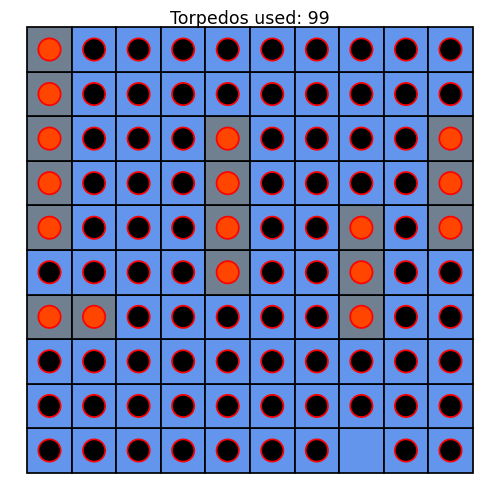

In [49]:
board = Board(dim=10)

In [50]:
test_gym_env = BattleshipEnvClass()
agent = RLAgent(board, model, test_gym_env)
agent.play_until_completion()

99